In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('dataset.csv')
df = data.copy()

In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
percent = round((df.isnull().sum()/len(df.index)),2)
percent

stn_code                       0.33
sampling_date                  0.00
state                          0.00
location                       0.00
agency                         0.34
type                           0.01
so2                            0.08
no2                            0.04
rspm                           0.09
spm                            0.54
location_monitoring_station    0.06
pm2_5                          0.98
date                           0.00
dtype: float64

In [8]:
df['agency'].value_counts()

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

In [9]:
df['type'].value_counts()

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

In [10]:
df = df.dropna(axis=0, subset=['type'])
df.isnull().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149478
type                                0
so2                             34188
no2                             15848
rspm                            35030
spm                            236748
location_monitoring_station     22098
pm2_5                          421035
date                                4
dtype: int64

In [11]:
df = df.dropna(axis = 0, subset = ['location'])
df.isnull().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149478
type                                0
so2                             34188
no2                             15848
rspm                            35030
spm                            236748
location_monitoring_station     22098
pm2_5                          421035
date                                4
dtype: int64

In [12]:
df = df.dropna(axis = 0, subset = ['so2'])
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [13]:
#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396161 entries, 0 to 435738
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     396161 non-null  object 
 1   location  396161 non-null  object 
 2   type      396161 non-null  object 
 3   so2       396161 non-null  float64
 4   no2       394180 non-null  float64
 5   rspm      366518 non-null  float64
 6   spm       167983 non-null  float64
 7   pm2_5     9195 non-null    float64
 8   date      396157 non-null  object 
dtypes: float64(5), object(4)
memory usage: 30.2+ MB


In [15]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [16]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

type
Residential    244017
Industrial     137420
Other           14724
Name: count, dtype: int64

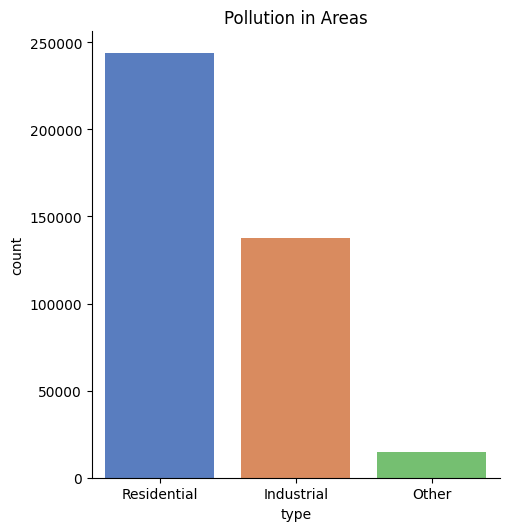

In [17]:
sns.catplot(x = "type", kind = "count", palette = "muted", data = df)
plt.title("Pollution in Areas")
plt.show()

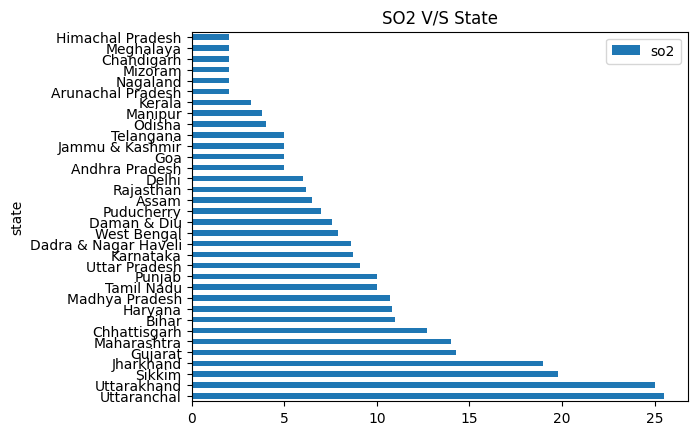

In [18]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.barh()
plt.title("SO2 V/S State")
plt.show()

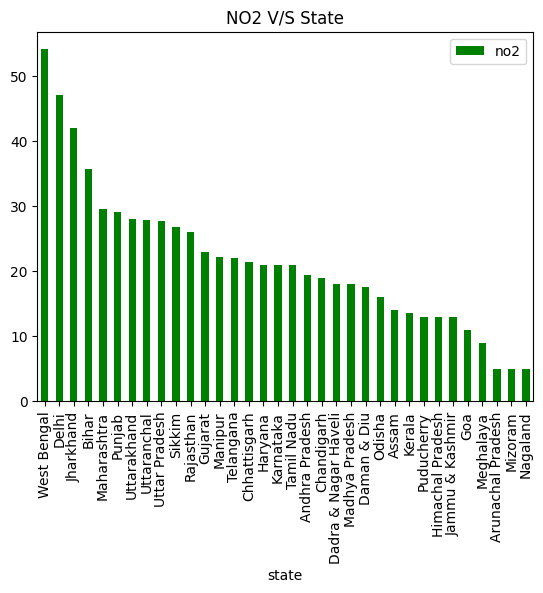

In [19]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'g')
plt.title("NO2 V/S State")
plt.show()

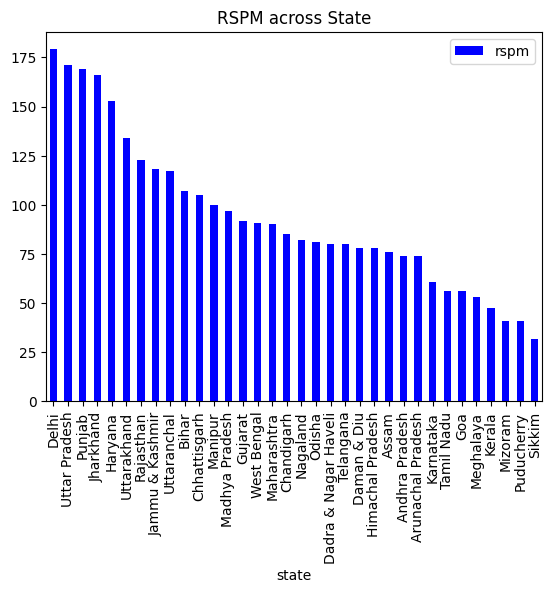

In [20]:
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'b')
plt.title("RSPM across State")
plt.show()

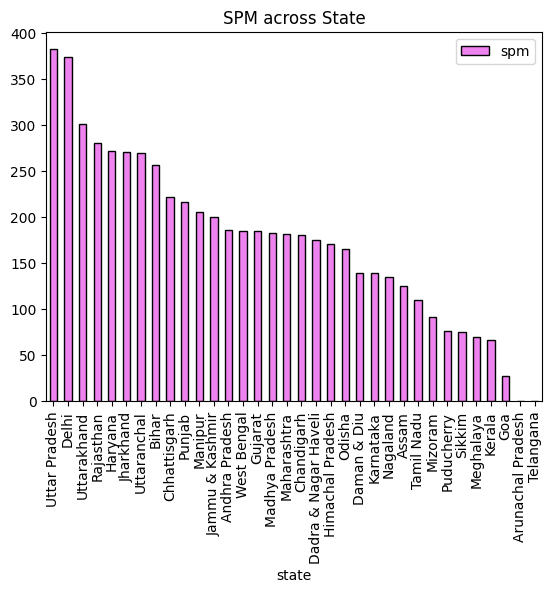

In [21]:
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'violet',edgecolor='black')
plt.title("SPM across State")
plt.show()

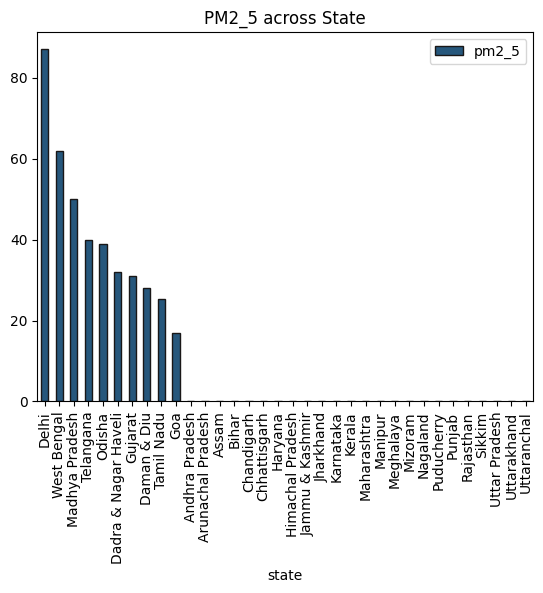

In [22]:
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = '#26577C',edgecolor="#191717")
plt.title("PM2_5 across State")
plt.show()

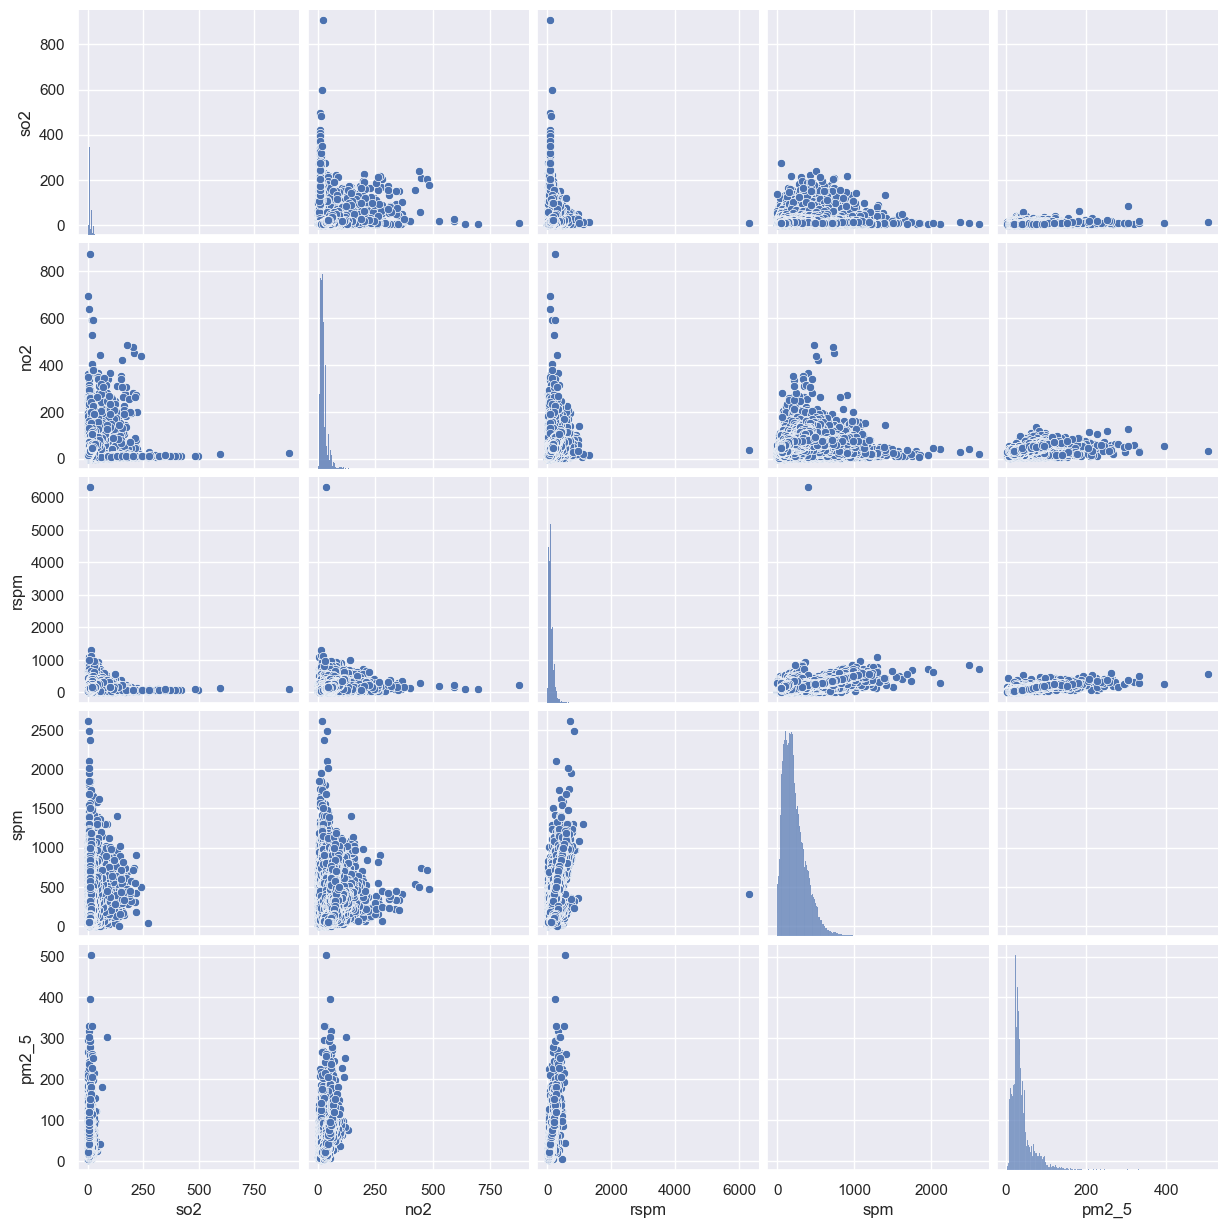

In [23]:

#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

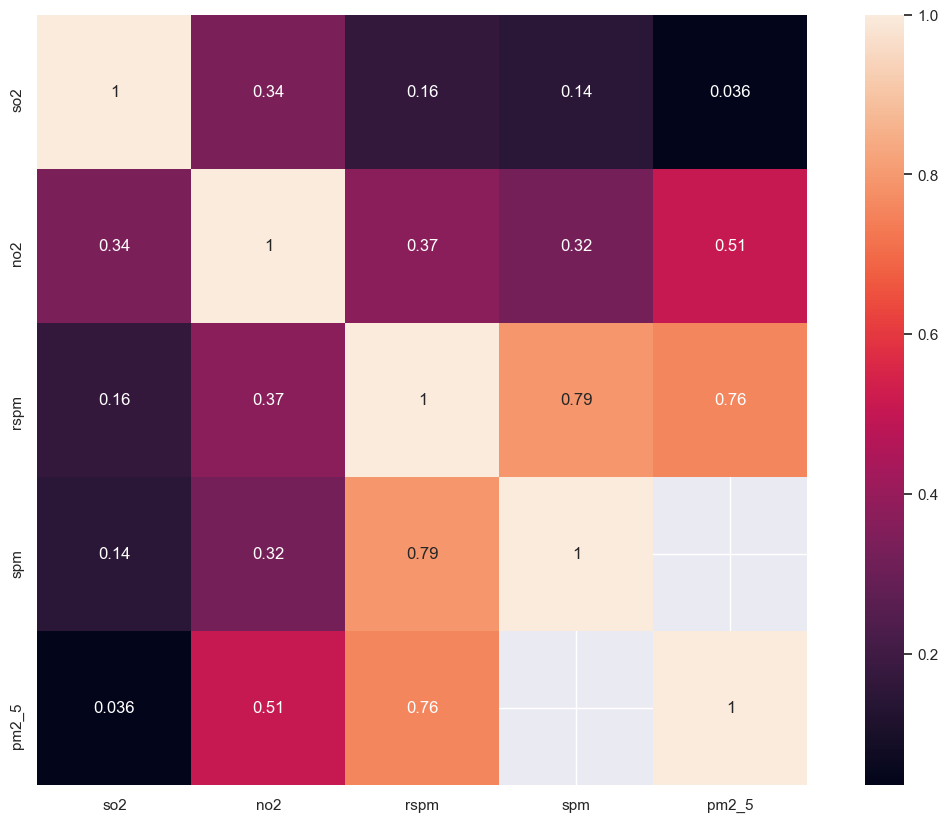

In [24]:
#Correlation matrix
numeric_columns = df.select_dtypes(include=['float64']).columns
corrmat = df[numeric_columns].corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)
plt.show()

In [25]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

In [26]:
df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


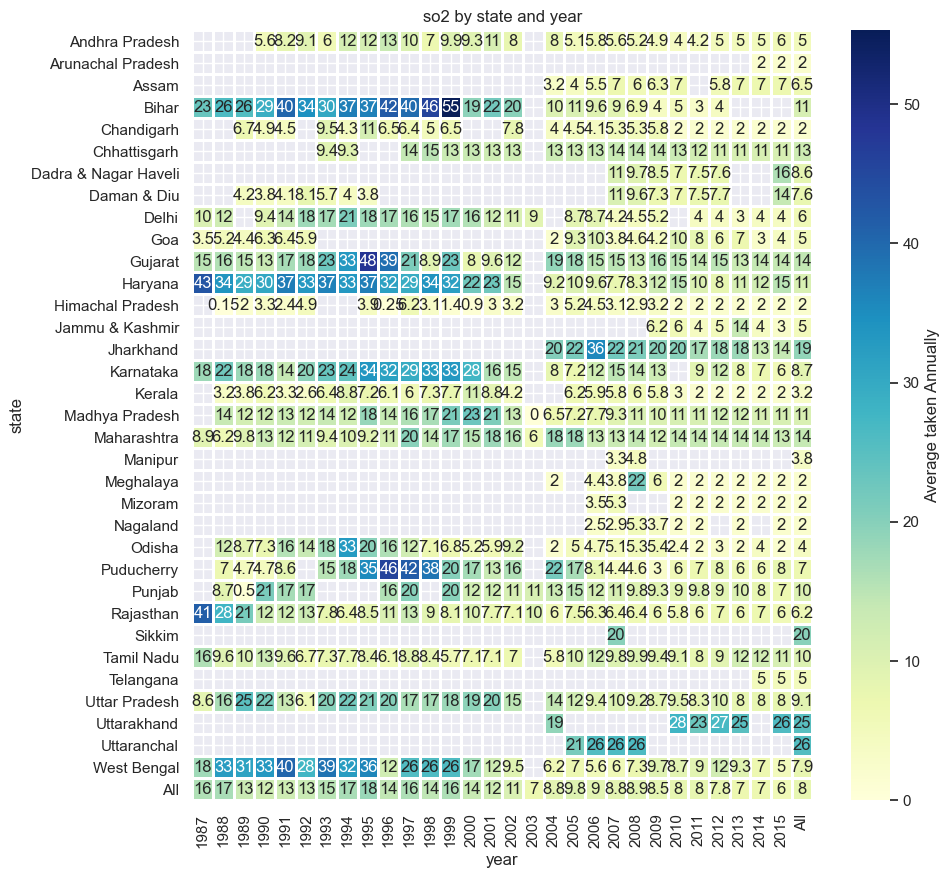

In [27]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

plt.show()
    

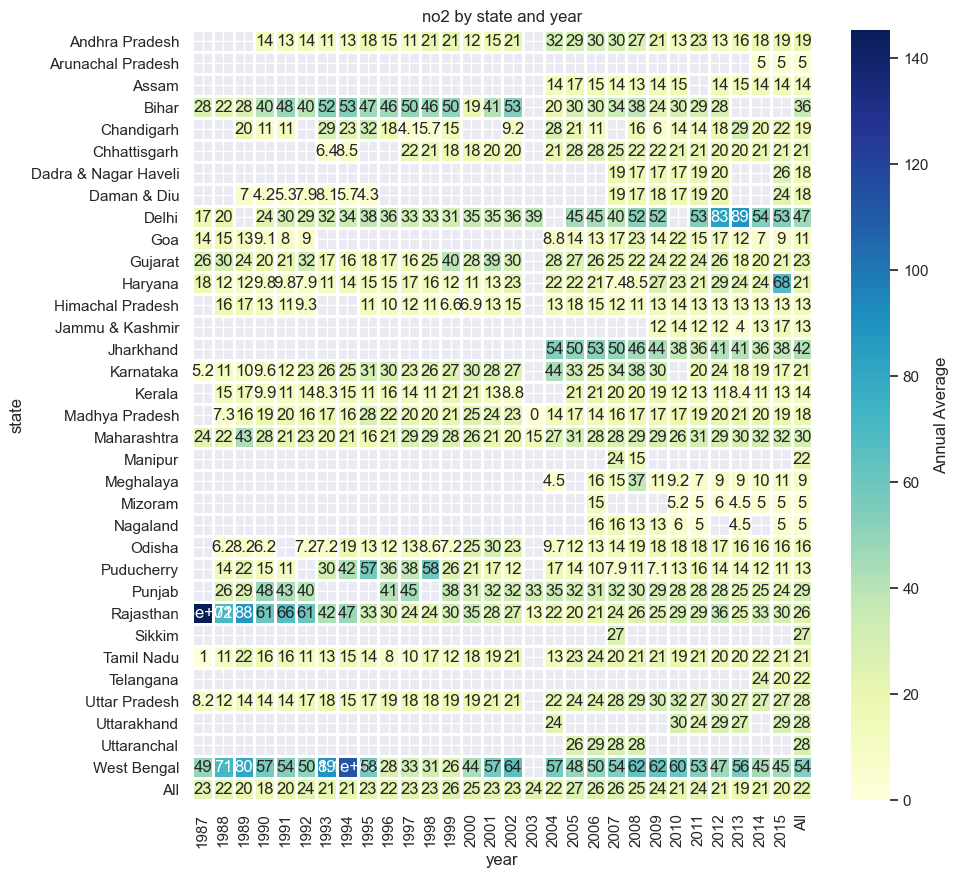

In [28]:
    
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

plt.show()

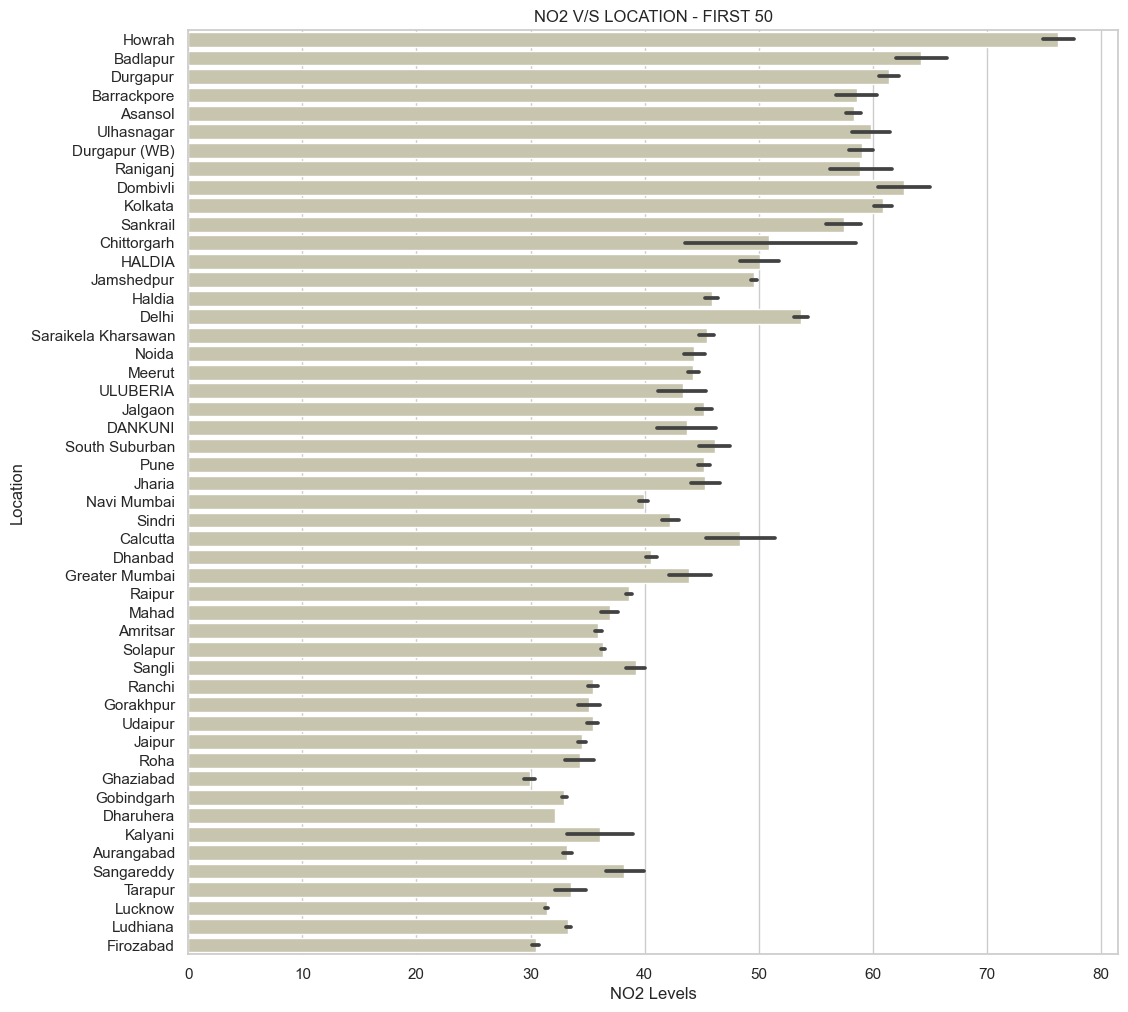

In [36]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Bar plot of NO2 vs location - descending order - first 50
plt.figure(figsize=(12, 12))
sns.barplot(x='no2', y='location', data=df, order=df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending=False).index[:50], color='#CCC8AA')
plt.title("NO2 V/S LOCATION - FIRST 50")
plt.xlabel("NO2 Levels")
plt.ylabel("Location")
plt.show()


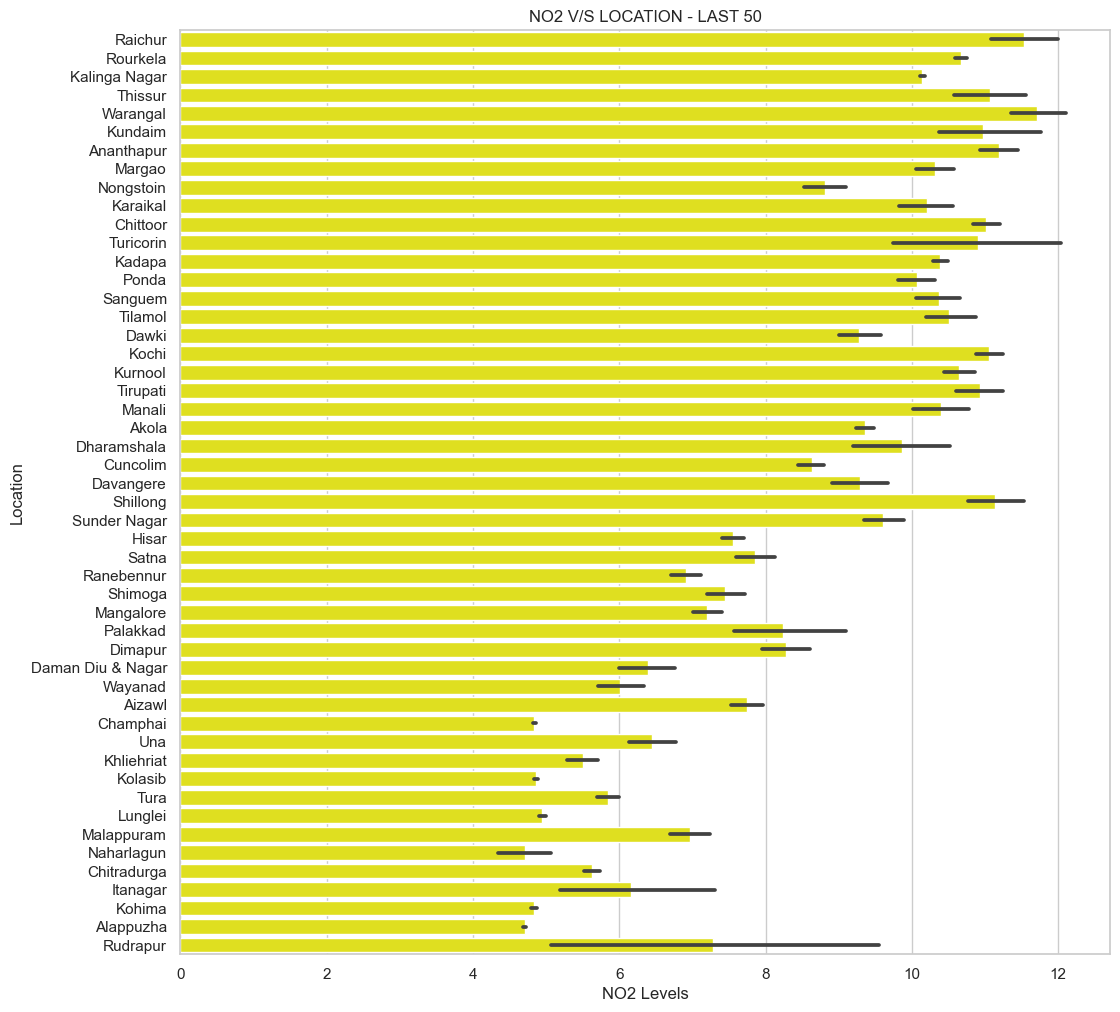

In [37]:

# Bar plot of NO2 vs location - descending order - last 50
plt.figure(figsize=(12, 12))
sns.barplot(x='no2', y='location', data=df, order=df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending=False).index[-50:], color='yellow')
plt.title("NO2 V/S LOCATION - LAST 50")
plt.xlabel("NO2 Levels")
plt.ylabel("Location")
plt.show()


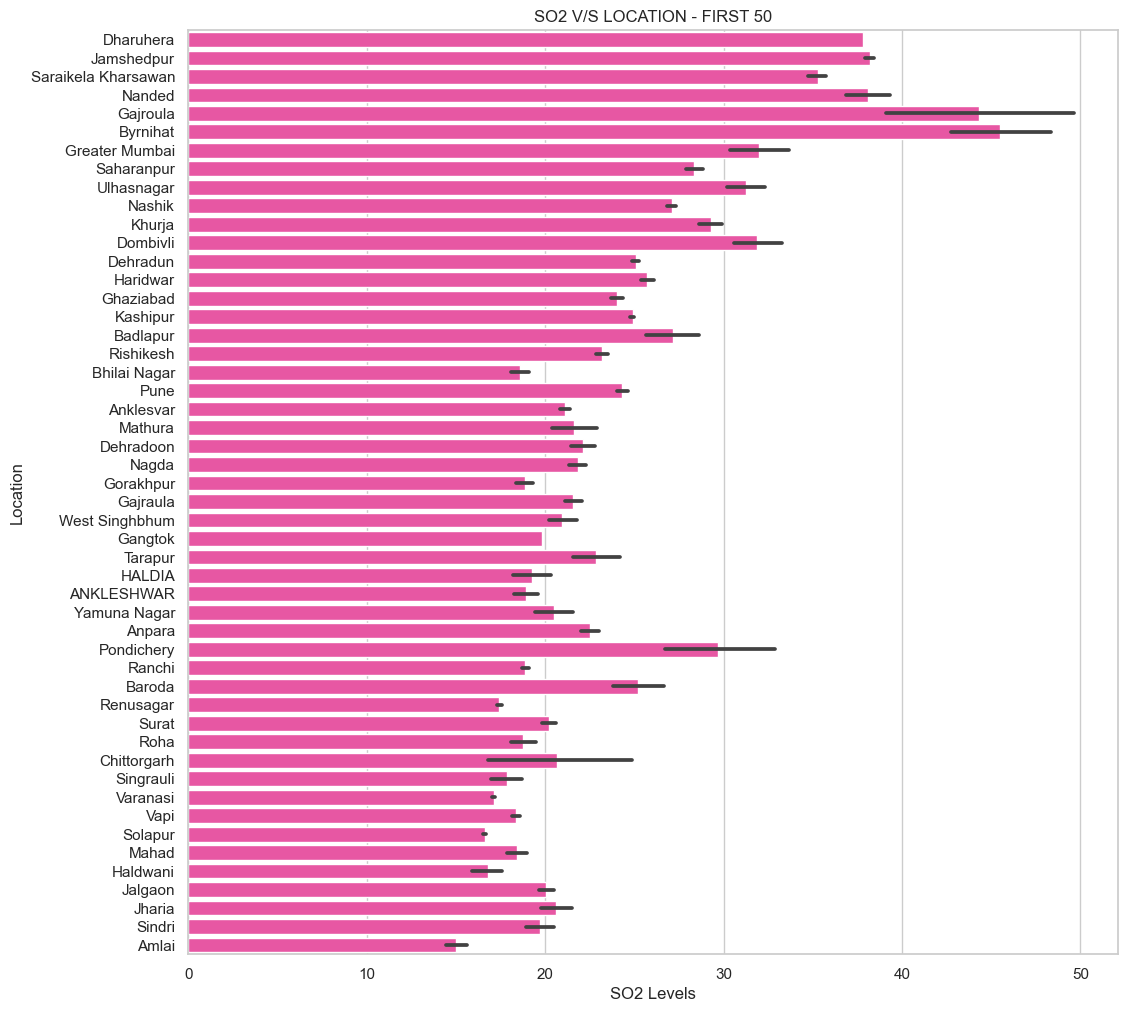

In [38]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Bar plot of SO2 vs location - descending order - first 50
plt.figure(figsize=(12, 12))
sns.barplot(x='so2', y='location', data=df, order=df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending=False).index[:50], color='#FF3FA4')
plt.title("SO2 V/S LOCATION - FIRST 50")
plt.xlabel("SO2 Levels")
plt.ylabel("Location")
plt.show()


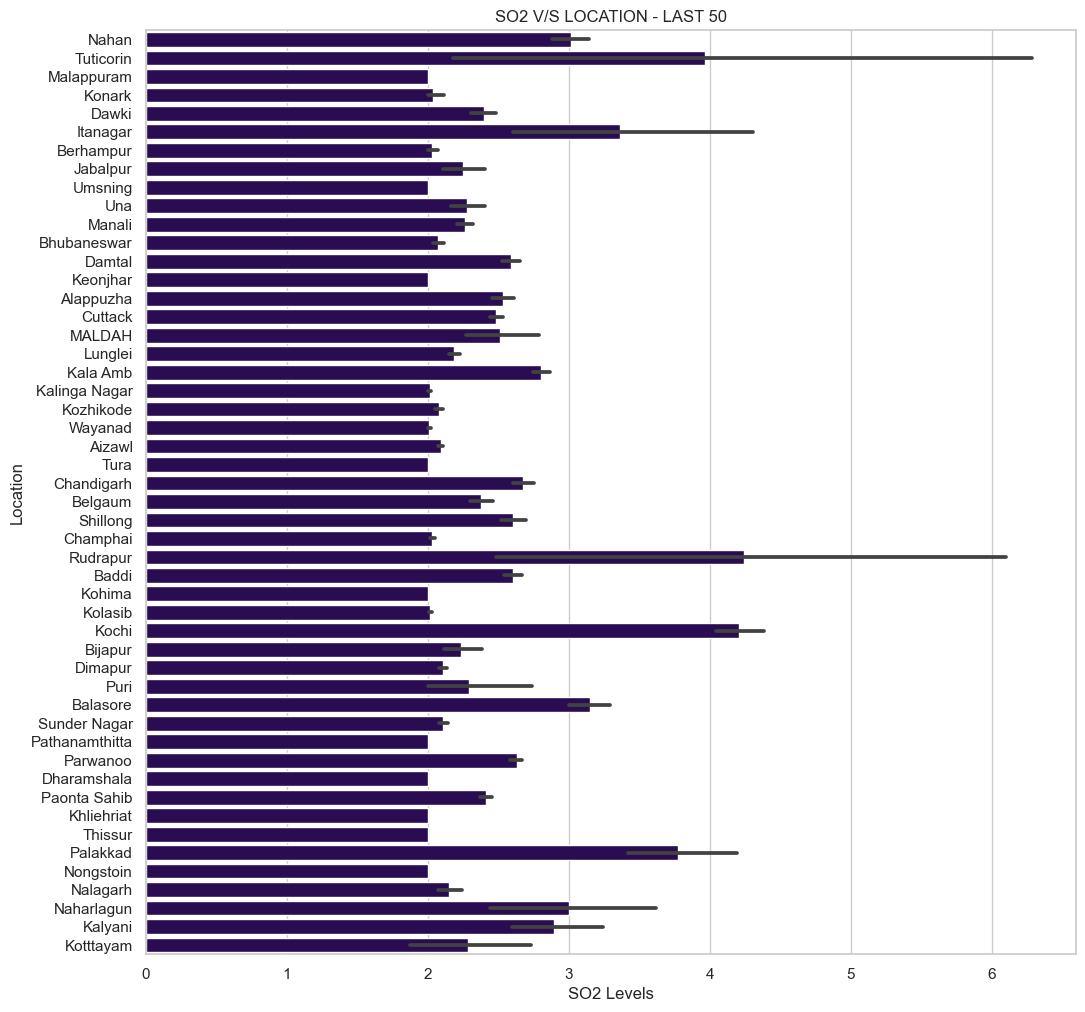

In [39]:

# Bar plot of SO2 vs location - descending order - last 50
plt.figure(figsize=(12, 12))
sns.barplot(x='so2', y='location', data=df, order=df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending=False).index[-50:], color='#27005D')
plt.title("SO2 V/S LOCATION - LAST 50")
plt.xlabel("SO2 Levels")
plt.ylabel("Location")
plt.show()


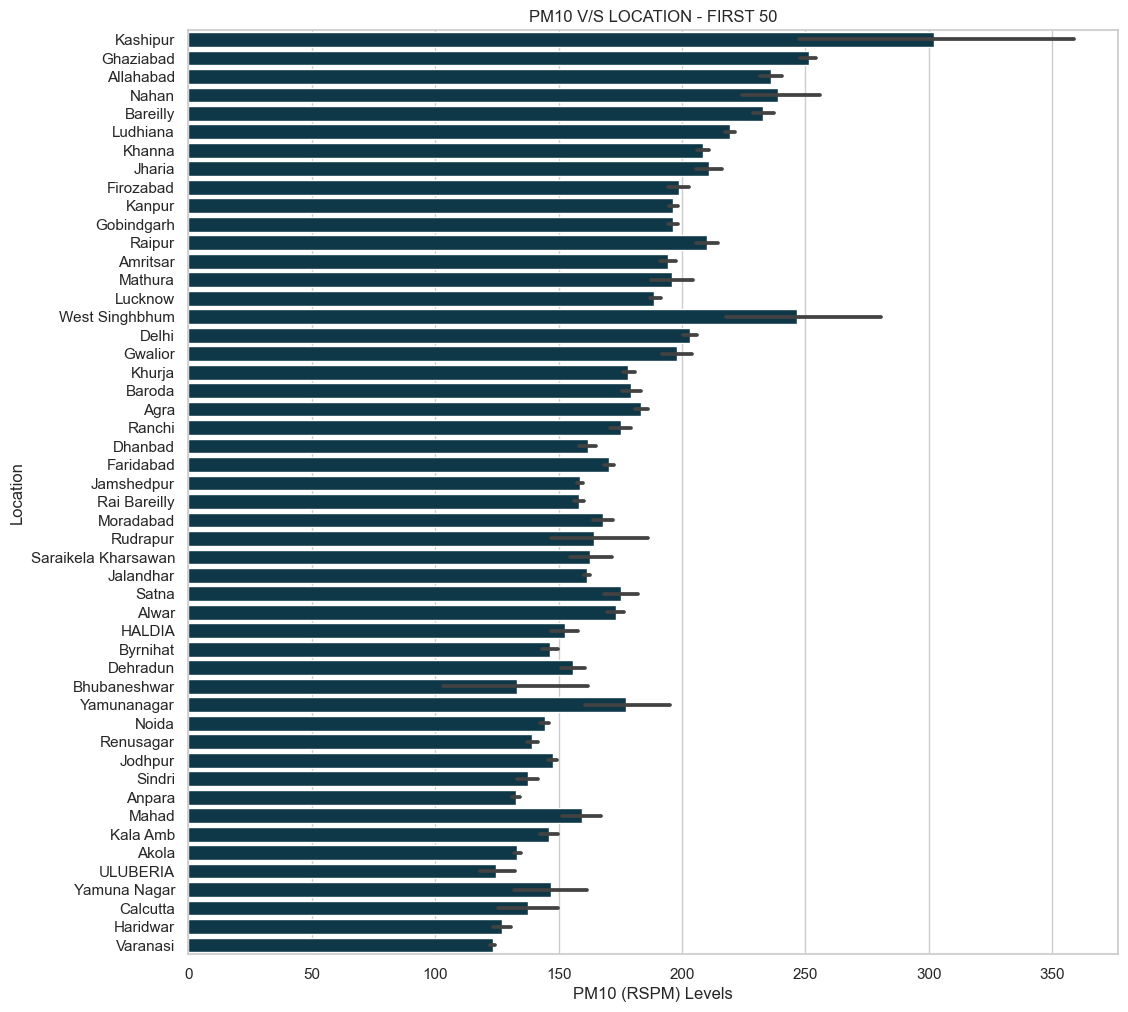

In [40]:

# Set the style for Seaborn
sns.set(style="whitegrid")

# Bar plot of PM10 (rspm) vs location - descending order - first 50
plt.figure(figsize=(12, 12))
sns.barplot(x='rspm', y='location', data=df, order=df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending=False).index[:50], color='#053B50')
plt.title("PM10 V/S LOCATION - FIRST 50")
plt.xlabel("PM10 (RSPM) Levels")
plt.ylabel("Location")
plt.show()


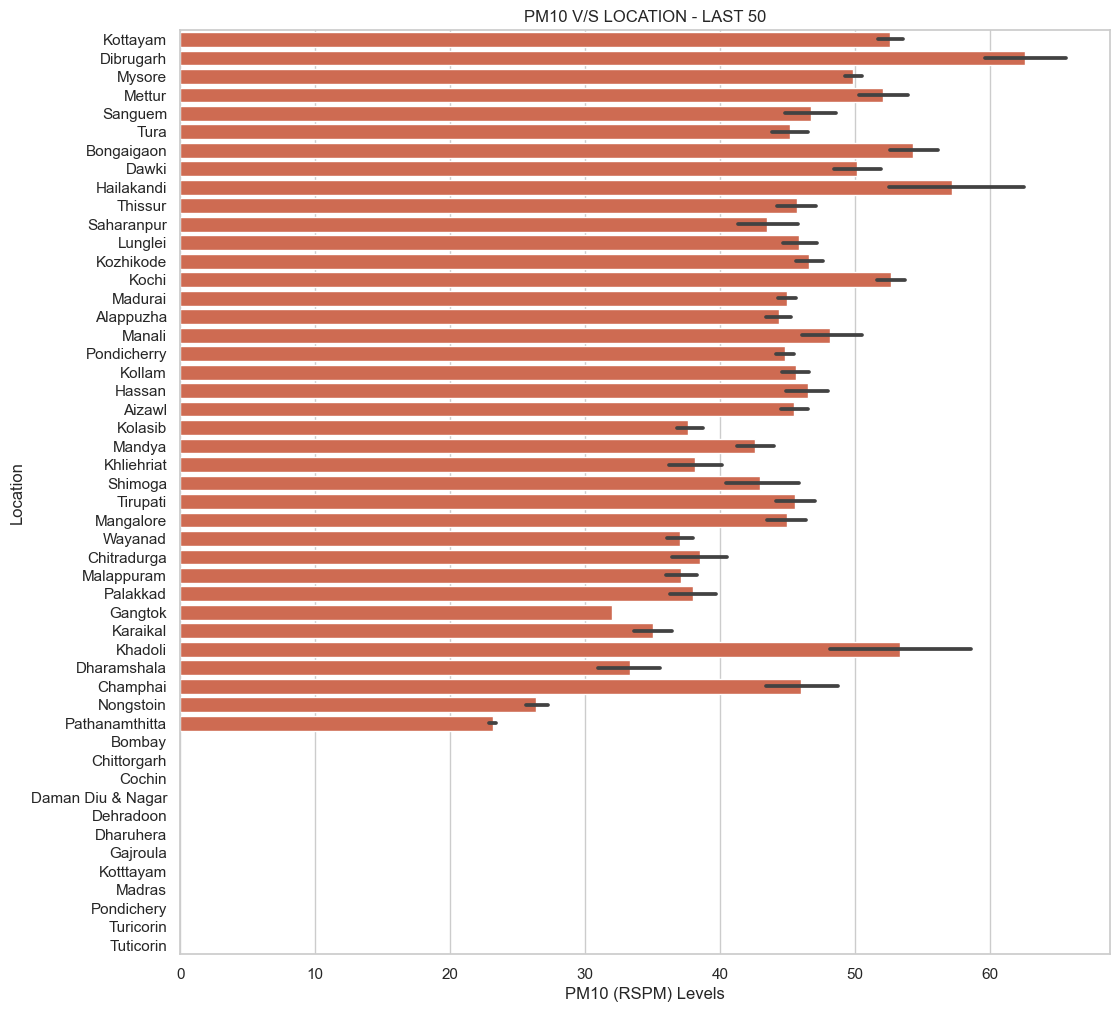

In [41]:

# Bar plot of PM10 (rspm) vs location - descending order - last 50
plt.figure(figsize=(12, 12))
sns.barplot(x='rspm', y='location', data=df, order=df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending=False).index[-50:], color='#E25E3E')
plt.title("PM10 V/S LOCATION - LAST 50")
plt.xlabel("PM10 (RSPM) Levels")
plt.ylabel("Location")
plt.show()

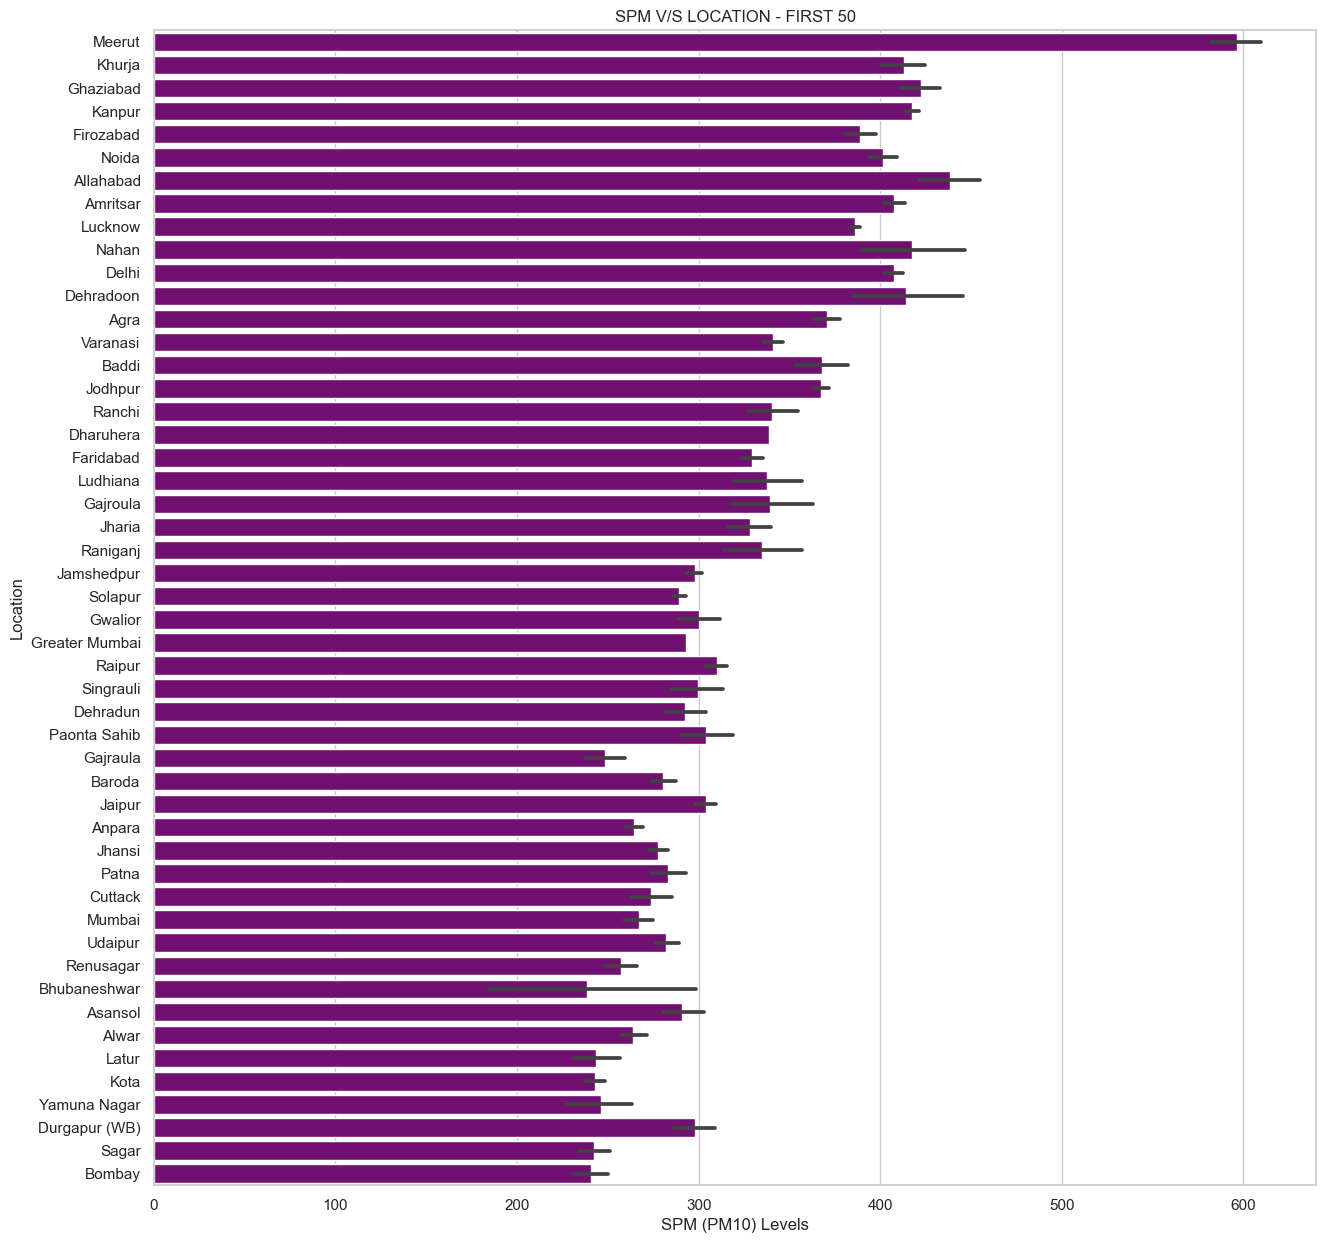

In [42]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Bar plot of SPM (PM10) vs location - descending order - first 50
plt.figure(figsize=(15, 15))
sns.barplot(x='spm', y='location', data=df, order=df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending=False).index[:50], color='purple')
plt.title("SPM V/S LOCATION - FIRST 50")
plt.xlabel("SPM (PM10) Levels")
plt.ylabel("Location")
plt.show()


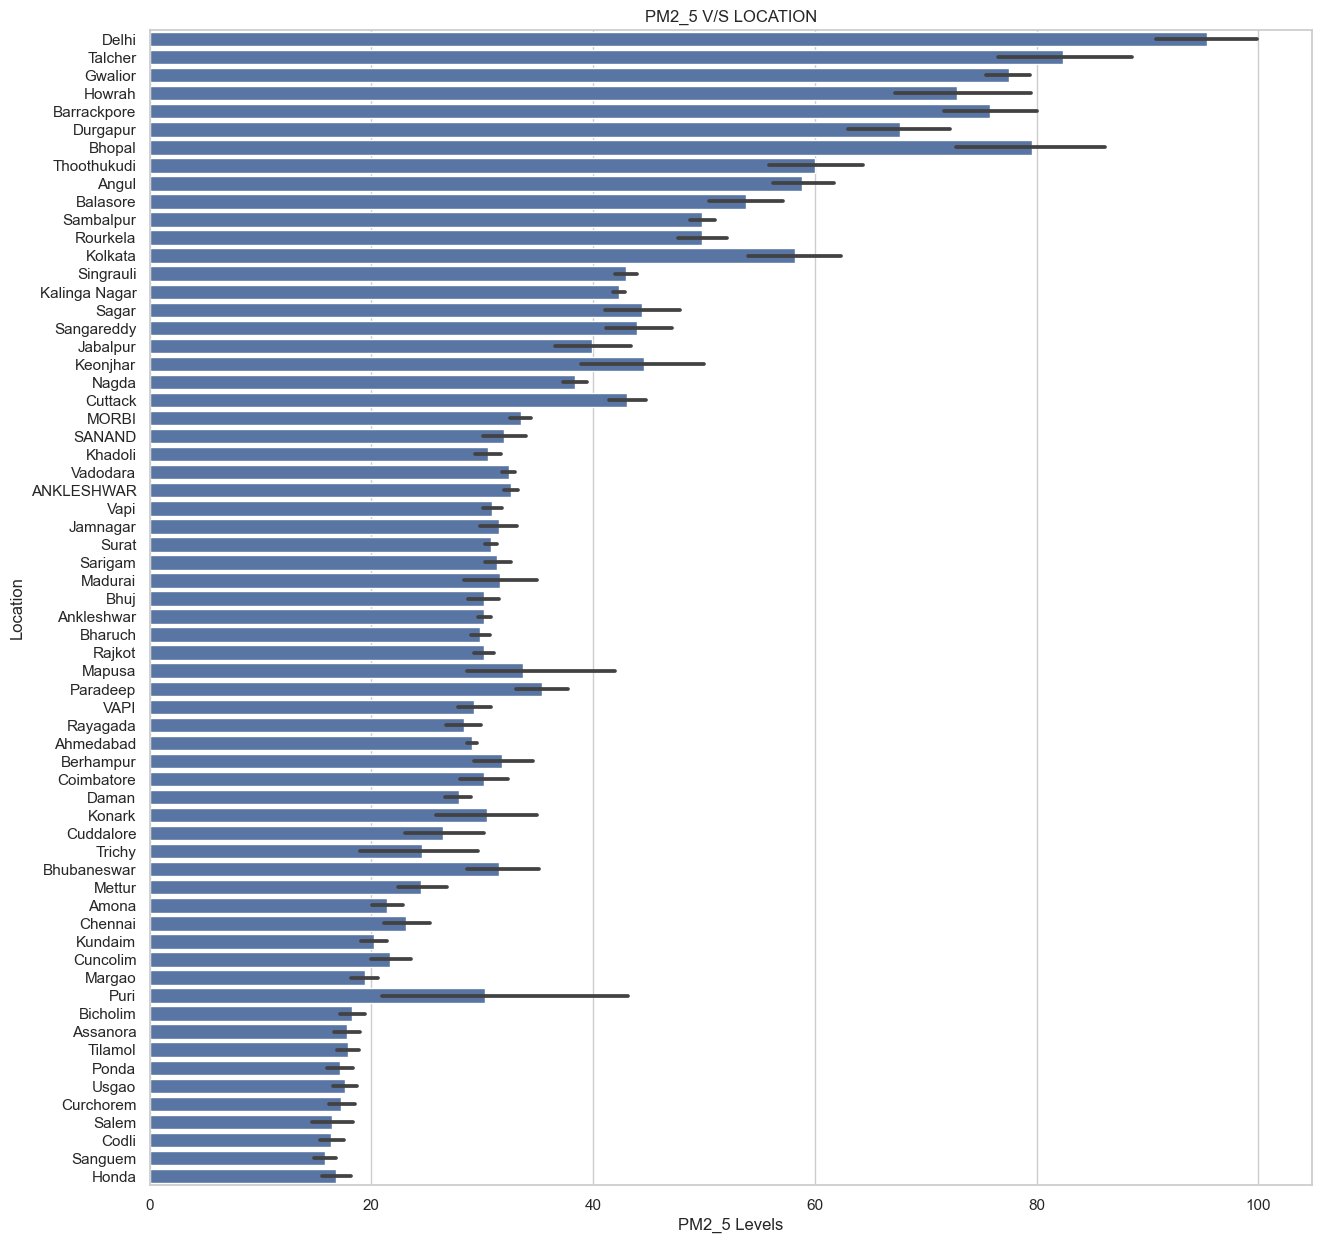

In [43]:

# Bar plot of PM2_5 vs location - descending order - all non-null values
plt.figure(figsize=(15, 15))
sns.barplot(x='pm2_5', y='location', data=df, order=df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending=False).index[:64], color='b')
plt.title("PM2_5 V/S LOCATION")
plt.xlabel("PM2_5 Levels")
plt.ylabel("Location")
plt.show()


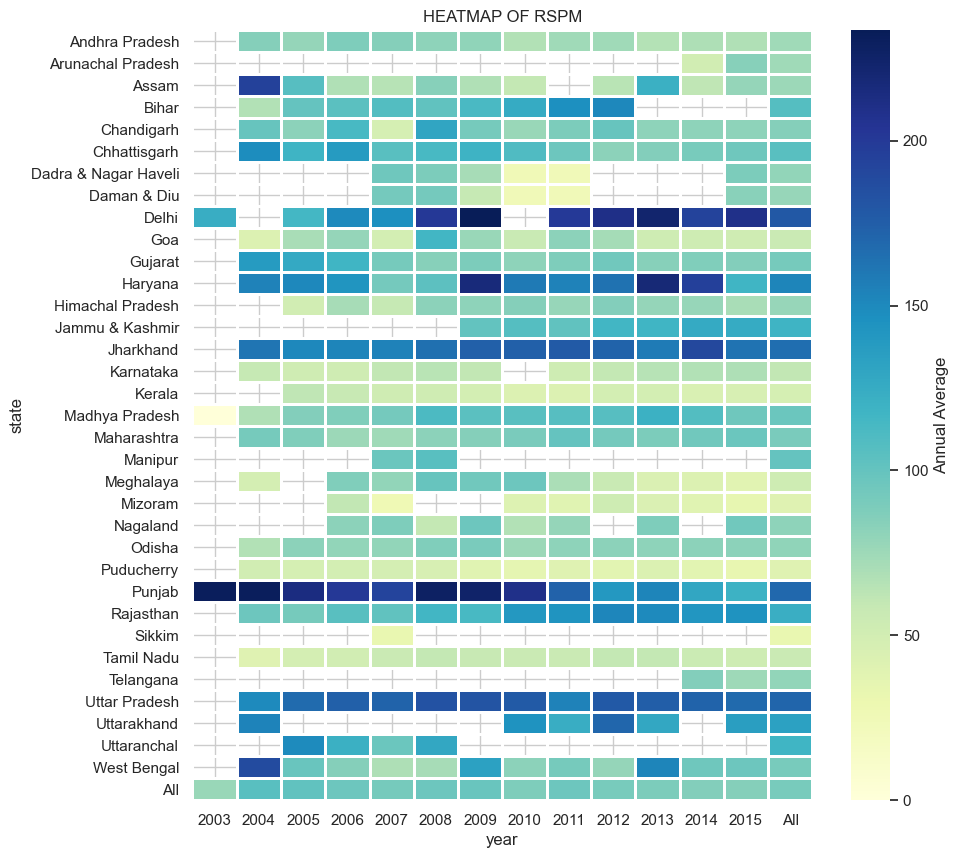

In [33]:

# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

plt.title("HEATMAP OF RSPM")
plt.show()

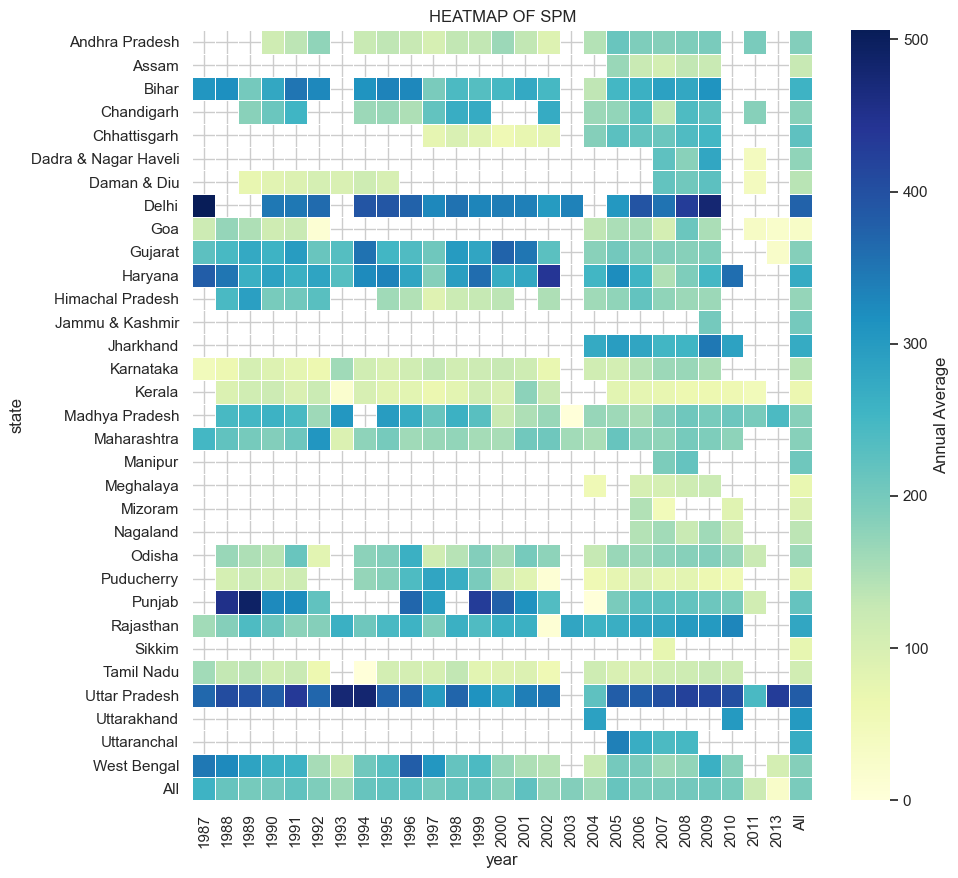

In [34]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})
plt.title("HEATMAP OF SPM")
plt.show()